#### The code for generating Fig. 3 of arXiv: 1809.01146

In [1]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

from scipy import interpolate
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [18]:
colname_Cij = np.array(['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08',
       'C09', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29',
       'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C44', 'C45',
       'C46', 'C47', 'C48', 'C49', 'C55', 'C56', 'C57', 'C58', 'C59',
       'C66', 'C67', 'C68', 'C69', 'C77', 'C78', 'C79', 'C88', 'C89',
       'C99'])

ell = np.array([  22.83133051,   29.75319931,   38.77359967,   50.52875208,
         65.84776262,   85.81110088,  111.82680688,  145.72980195,
        189.91130811,  247.48750405,  322.51931319,  420.29882591,
        547.72255751,  713.77786828,  930.1768537 , 1212.18241363,
       1579.68476432, 2058.60432107, 2682.71989859, 3496.05117438,
       4555.96345347])

Nell= len(ell)

In [25]:
def gen_Tb_Cij(simName):
    # available simName : 
    # "illustris","mb2","eagle","HzAGN","dmo"
    # "owls_DBLIMFV1618","owls_AGN","owls_NOSN","owls_NOSN_NOZCOOL","owls_NOZCOOL",
    # "owls_REF","owls_WDENS","owls_WML1V848","owls_WML4"
    
    data_dir = "../C_ell/"

    infile_datav=data_dir+"LSST_shear_shear_fid_"+simName+"_5000"
    Tb_datav = np.genfromtxt(infile_datav,skip_header=0,dtype="int,double",usecols=[0,1],names=["ind","Cl"])
    
    TbCij=Table()
    TbCij["ell"]=ell
    
    for i in range(len(colname_Cij)):
        TbCij[colname_Cij[i]]=Tb_datav["Cl"][Nell*i:Nell*i+Nell]
        
    return TbCij

In [33]:
TbCij_dmo = gen_Tb_Cij("dmo")

TbCij_illustris = gen_Tb_Cij("illustris")
TbCij_mb2       = gen_Tb_Cij("mb2")
TbCij_eagle     = gen_Tb_Cij("eagle")
TbCij_HzAGN     = gen_Tb_Cij("HzAGN")

TbCij_AGN          = gen_Tb_Cij("owls_AGN")          
TbCij_DBLIMFV1618  = gen_Tb_Cij("owls_DBLIMFV1618")   
TbCij_NOSN         = gen_Tb_Cij("owls_NOSN")         
TbCij_NOSN_NOZCOOL = gen_Tb_Cij("owls_NOSN_NOZCOOL") 
TbCij_NOZCOOL      = gen_Tb_Cij("owls_NOZCOOL")
TbCij_REF          = gen_Tb_Cij("owls_REF")
TbCij_WDENS        = gen_Tb_Cij("owls_WDENS")
TbCij_WML1V848     = gen_Tb_Cij("owls_WML1V848")
TbCij_WML4         = gen_Tb_Cij("owls_WML4")

In [30]:
TbCij_mb2

ell,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09,C11,C12,C13,C14,C15,C16,C17,C18,C19,C22,C23,C24,C25,C26,C27,C28,C29,C33,C34,C35,C36,C37,C38,C39,C44,C45,C46,C47,C48,C49,C55,C56,C57,C58,C59,C66,C67,C68,C69,C77,C78,C79,C88,C89,C99
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
22.83133051,2.438902e-09,4.094163e-09,4.711431e-09,5.054337e-09,5.285193e-09,5.45802e-09,5.598001e-09,5.721718e-09,5.838324e-09,5.97154e-09,8.341582e-09,1.053324e-08,1.183146e-08,1.271159e-08,1.337305e-08,1.390814e-08,1.437441e-08,1.481799e-08,1.533292e-08,1.428201e-08,1.677954e-08,1.85204e-08,1.983205e-08,2.090051e-08,2.183015e-08,2.27081e-08,2.373762e-08,2.045443e-08,2.319001e-08,2.528104e-08,2.699014e-08,2.847765e-08,2.988069e-08,3.153383e-08,2.691608e-08,2.989327e-08,3.234098e-08,3.447952e-08,3.650409e-08,3.887935e-08,3.376756e-08,3.705777e-08,3.995836e-08,4.270093e-08,4.591886e-08,4.123639e-08,4.500917e-08,4.861116e-08,5.282621e-08,4.976464e-08,5.441021e-08,5.985719e-08,6.032106e-08,6.742362e-08,7.713209e-08
29.75319931,1.806662e-09,3.084923e-09,3.568988e-09,3.83801e-09,4.018995e-09,4.154705e-09,4.26425e-09,4.361136e-09,4.452598e-09,4.557225e-09,6.438222e-09,8.208881e-09,9.266254e-09,9.984548e-09,1.052276e-08,1.095949e-08,1.133916e-08,1.170066e-08,1.212103e-08,1.130967e-08,1.341243e-08,1.488881e-08,1.600227e-08,1.690486e-08,1.769294e-08,1.843723e-08,1.931015e-08,1.658598e-08,1.898021e-08,2.081986e-08,2.231623e-08,2.362388e-08,2.485931e-08,2.630813e-08,2.23133e-08,2.500134e-08,2.722392e-08,2.915824e-08,3.09991e-08,3.314998e-08,2.85788e-08,3.163686e-08,3.432929e-08,3.688996e-08,3.98829e-08,3.559033e-08,3.918234e-08,4.262127e-08,4.662854e-08,4.379289e-08,4.831835e-08,5.362528e-08,5.418468e-08,6.12535e-08,7.11624e-08
38.77359967,1.309545e-09,2.26994e-09,2.639827e-09,2.846103e-09,2.984473e-09,3.088291e-09,3.172255e-09,3.246638e-09,3.316809e-09,3.397357e-09,4.856236e-09,6.247414e-09,7.082865e-09,7.649862e-09,8.074946e-09,8.41968e-09,8.720073e-09,9.005676e-09,9.338314e-09,8.715724e-09,1.041118e-08,1.160504e-08,1.250485e-08,1.323718e-08,1.387664e-08,1.44786e-08,1.518613e-08,1.301126e-08,1.49931e-08,1.652636e-08,1.777438e-08,1.886124e-08,1.988977e-08,2.10935e-08,1.781626e-08,2.010994e-08,2.200837e-08,2.36679e-08,2.524426e-08,2.708492e-08,2.322537e-08,2.59047e-08,2.827564e-08,3.052482e-08,3.315812e-08,2.944331e-08,3.268758e-08,3.578117e-08,3.940136e-08,3.691685e-08,4.109706e-08,4.600102e-08,4.66337e-08,5.333487e-08,6.299614e-08
50.52875208,9.36112e-10,1.632607e-09,1.906596e-09,2.059579e-09,2.162052e-09,2.239169e-09,2.301315e-09,2.356559e-09,2.408568e-09,2.468477e-09,3.569055e-09,4.641793e-09,5.286393e-09,5.724854e-09,6.054199e-09,6.320076e-09,6.552219e-09,6.773439e-09,7.030126e-09,6.567769e-09,7.896604e-09,8.835166e-09,9.544329e-09,1.011918e-08,1.062147e-08,1.109535e-08,1.165032e-08,9.954309e-09,1.153521e-08,1.275522e-08,1.375302e-08,1.462267e-08,1.544482e-08,1.640636e-08,1.380838e-08,1.567155e-08,1.721596e-08,1.856995e-08,1.985172e-08,2.135137e-08,1.823884e-08,2.046397e-08,2.243929e-08,2.431025e-08,2.650143e-08,2.345668e-08,2.621234e-08,2.884997e-08,3.192864e-08,2.988165e-08,3.352937e-08,3.780848e-08,3.846583e-08,4.447508e-08,5.340579e-08
65.84776262,6.694145e-10,1.1611e-09,1.356606e-09,1.465793e-09,1.539292e-09,1.594212e-09,1.638836e-09,1.67819e-09,1.714981e-09,1.75799e-09,2.55275e-09,3.350647e-09,3.833626e-09,4.162483e-09,4.409185e-09,4.608868e-09,4.782407e-09,4.948243e-09,5.14108e-09,4.818411e-09,5.841305e-09,6.566453e-09,7.111751e-09,7.554941e-09,7.942538e-09,8.308159e-09,8.736316e-09,7.441315e-09,8.673638e-09,9.628609e-09,1.040597e-08,1.108411e-08,1.172643e-08,1.2476

In [31]:
blue1    ="#0300DB" #"#001CAA"
blue9   = "#214F94"

green1   ="forestgreen"#"g" #"#297F0F"
red1     ="#E00000" #"#C10019"
red9    = "#CC0204"#"#DB0200"

orange1  ="darkorange" #"#FA7921"
orange9 = "#FFA903"  

purple1  ="purple" #"#683885"
brown1   ="sienna"
gray1    ="grey" #"#626262"
gray9   = "#858278"

olive1   ="olive"

black = "#000000"

(-0.32, 0.43)

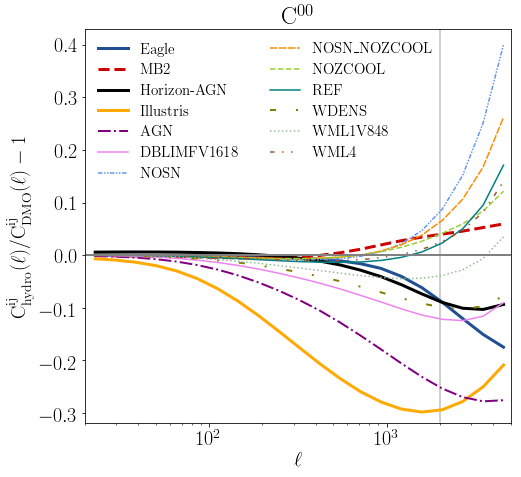

In [35]:
fig = plt.figure(figsize=(7.3,6.6))
plt.rc('text', usetex=True)      
plt.rc('font',size=20)

ax1=fig.add_axes([0.175 ,0.10,0.81,0.83])


l = TbCij_dmo["ell"]

colname_Cij="C00"
title=r'$\mathrm{C^{00}}$'


ax1.plot(l,TbCij_eagle[colname_Cij]       /TbCij_dmo[colname_Cij]-1,c=blue9           ,lw=3,label=r'$\mathrm{Eagle}$'    ,ls='-')
ax1.plot(l,TbCij_mb2[colname_Cij]         /TbCij_dmo[colname_Cij]-1,c=red9            ,lw=3,label=r'$\mathrm{MB2}$'      ,ls='--')
ax1.plot(l,TbCij_HzAGN[colname_Cij]       /TbCij_dmo[colname_Cij]-1,c=black           ,lw=3,label=r'$\mathrm{Horizon\mbox{-}AGN}$',ls='-')
ax1.plot(l,TbCij_illustris[colname_Cij]   /TbCij_dmo[colname_Cij]-1,c=orange9          ,lw=3,label=r'$\mathrm{Illustris}$',ls='-')
ax1.plot(l,TbCij_AGN[colname_Cij]         /TbCij_dmo[colname_Cij]-1,c=purple1         ,label=r'$\mathrm{AGN}$' ,ls="-.",lw=2)
ax1.plot(l,TbCij_DBLIMFV1618[colname_Cij] /TbCij_dmo[colname_Cij]-1,c='violet'       ,label=r'$\mathrm{DBLIMFV1618}$')
ax1.plot(l,TbCij_NOSN[colname_Cij]        /TbCij_dmo[colname_Cij]-1,c='cornflowerblue',label=r'$\mathrm{NOSN}$' ,ls=(0, (3, 1, 1, 1, 1, 1)))
ax1.plot(l,TbCij_NOSN_NOZCOOL[colname_Cij]/TbCij_dmo[colname_Cij]-1,c='darkorange'    ,label=r'$\mathrm{NOSN\_NOZCOOL}$',ls=(0, (5, 1)))
ax1.plot(l,TbCij_NOZCOOL[colname_Cij]     /TbCij_dmo[colname_Cij]-1,c='yellowgreen'   ,label=r'$\mathrm{NOZCOOL}$',ls= '--')
ax1.plot(l,TbCij_REF[colname_Cij]         /TbCij_dmo[colname_Cij]-1,c='teal'          ,label=r'$\mathrm{REF}$')
ax1.plot(l,TbCij_WDENS[colname_Cij]       /TbCij_dmo[colname_Cij]-1,c='olive'         ,label=r'$\mathrm{WDENS}$',ls=(0, (3, 10, 1, 10)),lw=2)
ax1.plot(l,TbCij_WML1V848[colname_Cij]    /TbCij_dmo[colname_Cij]-1,c='darkseagreen'  ,label=r'$\mathrm{WML1V848}$',ls=":")
ax1.plot(l,TbCij_WML4[colname_Cij]        /TbCij_dmo[colname_Cij]-1,c=brown1          ,label=r'$\mathrm{WML4}$',ls=(0, (3, 5, 1, 5, 1, 5)))

#ax1.axhline(y=0, color='gray', linestyle='-',label=r'$\mathrm{DMO}$',lw=2)
ax1.axhline(y=0, color='gray', linestyle='-',lw=2)



ax1.axvline(x=2000, color='silver', linestyle='-',zorder=-10)

ax1.set_xscale('log')
ax1.set_xlabel(r'$\mathrm{\ell}$')
ax1.set_ylabel(r'$\mathrm{C^{ij}_{hydro}(\ell)/C^{ij}_{DMO}(\ell)-1}$')
ax1.set_title(title)

ax1.legend(loc="best",prop={'size': 15.},ncol=2,frameon=False)
#ax1.set_xlim(20,2100)
ax1.set_xlim(20,5000)

ax1.set_ylim(-0.32,0.43)

#fig.savefig("C00.pdf")